# Simulated Annealing

Certain functions cannot be optimized through systematic deterministic approaches like gradient descent.  In particular, there are whole classes of optimization problems that are fundamentally hard to solve (so called NP-hard problems).  For these, there are no known algorithms that guarantee optimum solutions.

Therefore, we need to look for other techniques, usually *stochastic* or probabilistic techniques.  One among these is Simulated Annealing.

The name comes from the concept of Annealing in Metallurgy: by heating metal and then cooling it down while hammering it, you can get it to a more compact and strong state.  So the optimization technique here also brings in a concept of Temperature and uses that to guide the search for a solution.

## Function and Optimization types

While you can use SA on any arbitrary function, it makes sense to use it when regular techniques are not going to work.  An example of this is functions with multiple optima.  Here, we will also assume that we are interested in minimization of a function.

# Imports :

In [1]:
import random # To shuffle the list elements

In [2]:
# Set up imports
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [3]:
# Function with many minima
def yfunc(x):
    return x**2 + np.sin(8*x)

xbase = np.linspace(-2, 2, 100)
ybase = yfunc(xbase)
# plt.plot(xbase, ybase)
# plt.show()

## Gradient descent?

We can try the known technique of gradient descent here.  It works -- but does not really find the global optimum.  It just goes to whichever is the nearest minimum, which could be quite far from the global optimum depending on your choice of starting point

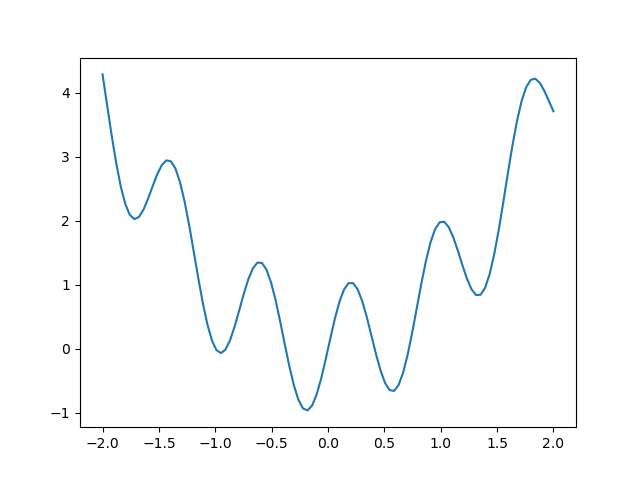

In [4]:
# Set up some large value for the best cost found so far
bestcost = 100000
# Generate several values within a search 'space' and check whether the new value is better
# than the best seen so far.
bestx = 1.1
rangemin, rangemax = -5, 5 
fig, ax = plt.subplots()
ax.plot(xbase, ybase)
xall, yall = [], []
lnall,  = ax.plot([], [], 'ro')
lngood, = ax.plot([], [], 'go', markersize=10)

# Learning rate 
lr = 0.01

def yprimefunc(x):
    return 2 * x + 8 * np.cos(8*x)

def onestepderiv(frame):
    global bestcost, bestx, lr
    x = bestx - yprimefunc(bestx) * lr 
    bestx = x
    y = yfunc(x)
    lngood.set_data(x, y)
    xall.append(x)
    yall.append(y)
    lnall.set_data(xall, yall)
    # return lngood,

ani= FuncAnimation(fig, onestepderiv, frames=range(10), interval=1000, repeat=False)
plt.show()

## Annealing

The alternative is to use a random search approach.  However, as we already saw with simpler functions, random search can take you all over the place and take a long time to find the minimum.  Instead, it makes sense to initially search over a wide range, but as time goes on, reduce the range of values over which you are going to search.

The first thing here is to introduce the concept of a *Move*.  This is a change from the present position to some neighbouring position, where we hope the solution is better than it is here.  Initially we would like to take large steps and move around to explore, but as time goes on and we are near an optimum, we want to take smaller steps.

We do this by introducing a notion of *Temperature*.  Initially the temperature is high, and the step size is also high.  More importantly, even if the new cost becomes *worse* than the current cost, we are still willing to accept the move with a probability given by

$$P(\Delta E) = e^{-\frac{\Delta E}{kT}}$$

Here $\Delta E$ is the cost increase as a result of the new move, and $k$ is a constant (conceptually similar to Boltzmann's constant in statistical mechanics, which is where these ideas are inspired from).  $T$ is the present temperature.  Clearly, as $T$ decreases, the probability calculated above will tend towards $e^{-\infty} = 0$.

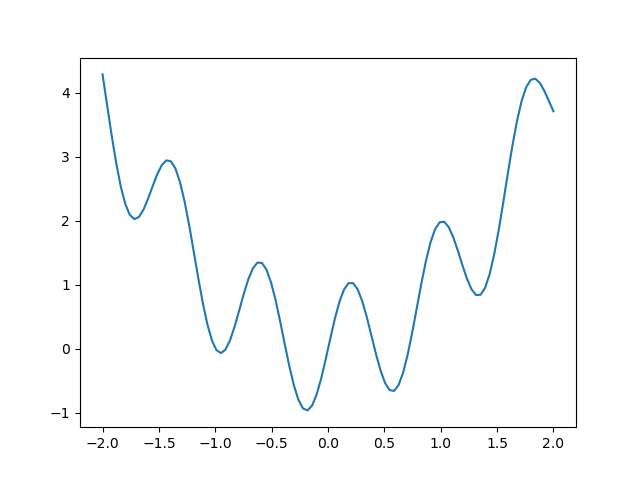

In [5]:
# Initial temperature
T = 3.0
decayrate = 0.95
# Set up some large value for the best cost found so far
bestcost = 100000
# Generate several values within a search 'space' and check whether the new value is better
# than the best seen so far.
bestx = -2
rangemin, rangemax = -2, 2 
fig, ax = plt.subplots()
ax.plot(xbase, ybase)
xall, yall = [], []
lnall,  = ax.plot([], [], 'ro')
lngood, = ax.plot([], [], 'go', markersize=10)
def onestep(frame):
    global bestcost, bestx, decayrate, T
    # Generate a random value \in -2, +2
    dx = (np.random.random_sample() - 0.5) * T
    x = bestx + dx
    # print(f"Old x = {x}, delta = {dx}")
    y = yfunc(x)
    if y < bestcost:
        # print(f"Improved from {bestcost} at {bestx} to {y} at {x}")
        bestcost = y
        bestx = x
        lngood.set_data(x, y)
    else:
        toss = np.random.random_sample()
        if toss < np.exp(-(y-bestcost)/T):
            bestcost = y
            bestx = x
            lngood.set_data(x, y)
        # print(f"New cost {y} worse than best so far: {bestcost}")
        pass
    T = T * decayrate
    xall.append(x)
    yall.append(y)
    lnall.set_data(xall, yall)
    # return lngood,

ani= FuncAnimation(fig, onestep, frames=range(100), interval=100, repeat=False)
plt.show()

# Assignment

## Part 1 - Simple

Write a function that takes as input the following:

- another function (note that in Python you can pass functions as arguments to other functions)
- starting point
- temperature 
- learning/decay rate

and then proceeds to apply Simulated Annealing to minimize the function.  This is more or less the same as what has been given above, but you need to encapsulate it all into a simple function and demonstrate how it works on arbitrary functions.  

## Part 2 

Note that part 2 is also part of the regular assignment.  It is **not** optional, but is specified as a separate problem part to break the overall problem into portions in case you find this too hard to solve at one shot.  

The traveling salesman problem gives you a set of city locations (x, y coordinates).  Your goal is to find a route from a given starting point that visits all the cities exactly once and then returns to the origin, with the minimum total distance covered (distance is measured as Euclidean distance $\sqrt{(x_2-x_1)^2 + (y_2-y_1)^2}$).  

You will be given a file where the first line is the number of cities *N*, and the next *N* lines give the cities as a list of x, y coordinates: for example
```
4
0.0 1.5
2.3 6.1
4.2 1.3
2.1 4.5
```

Your goal is to give a sequence of numbers, for example `[0 3 2 1]` which specifies the order in which to visit the cities.  Note that after the last city you will come back to the first one in the list.  

Plot the cities with the path you have specified, and output the total length of the shortest path discovered so far.

## Report

You need to submit a .zip file that contains all your code (either notebook or plain Python files) and a PDF file (can be generated from the notebook) that clearly documents what you have implemented and how to run your code.  For part 1, you need to also show the output plot that shows how the search proceeded when run on the function given in the presentation.

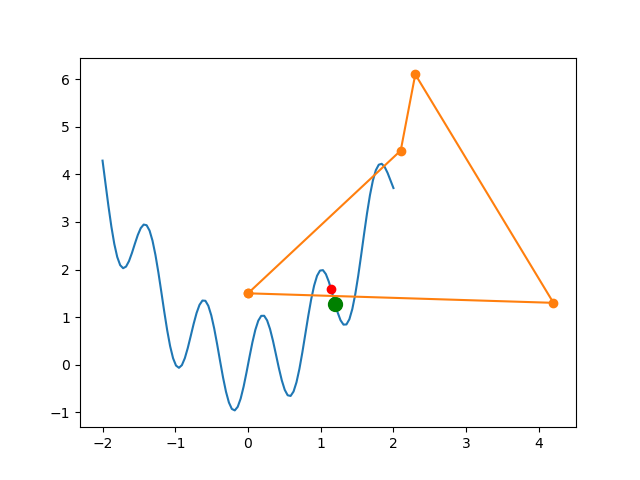

In [6]:
# Example Python input and plot
x_cities = np.array([0.0, 2.3, 4.2, 2.1])
y_cities = np.array([1.5, 6.1, 1.3, 4.5])
finalorder = [0, 3, 1, 2]

# Rearrange for plotting
xplot = x_cities[finalorder] 
yplot = y_cities[finalorder]
xplot = np.append(xplot, xplot[0])
yplot = np.append(yplot, yplot[0])
plt.close()
plt.plot(xplot, yplot, 'o-')
plt.show()

# Part 1 :

In [7]:
def part1_function_final(function, starting_point, temperature, decay_rate):
    
    bestcost = 100000
    bestx = starting_point 
    T = temperature
    decayrate = decay_rate
    
    fig, ax = plt.subplots()
    xbase = np.linspace(-2, 2, 100)
    ybase = function(xbase)
    ax.plot(xbase, ybase)
    xall, yall = [], []
    lnall,  = ax.plot([], [], 'ro')
    lngood, = ax.plot([], [], 'go', markersize=10)
    
    # The below function is the same as used in the presentation of Week 7 for animation of the function 
    def onestep(frame):
        # nonlocal is used when the variables are present outside the function defined inside another function, but not global
        nonlocal bestcost, bestx, decayrate, T
        # Generate a random value \in -2, +2
        dx = (np.random.random_sample() - 0.5) * T
        x = bestx + dx
        # print(f"Old x = {x}, delta = {dx}")
        y = function(x)
        if y < bestcost:
            # print(f"Improved from {bestcost} at {bestx} to {y} at {x}")
            bestcost = y
            bestx = x
            lngood.set_data(x, y)
        else:
            toss = np.random.random_sample()
            if toss < np.exp(-(y-bestcost)/T):
                bestcost = y
                bestx = x
                lngood.set_data(x, y)
            # print(f"New cost {y} worse than best so far: {bestcost}")
            pass
        T = T * decayrate
        xall.append(x)
        yall.append(y)
        lnall.set_data(xall, yall)
        # return lngood,

    ani= FuncAnimation(fig, onestep, frames=range(100), interval=100, repeat=False)
    return ani # returning the animation, to be displayed ahead

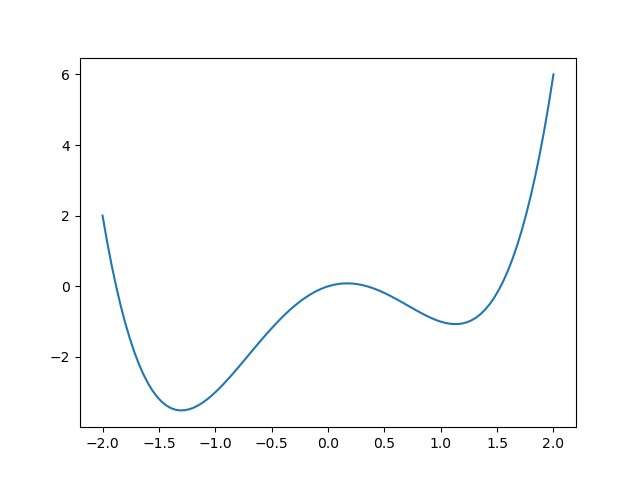

In [8]:
def function(x):
#     return x**2 + np.sin(8*x)
    return x**4 - 3*x**2 + 1*x 
#     return np.cos(x)**4 - np.sin(x)**3 - 4*np.sin(x)**2 + np.cos(x) + 1


plt.close()
# ani = part1_function_final(function, -1.45, 3.0, 0.95)
ani = part1_function_final(function, 1.5, 3.0, 0.95)
# ani = part1_function_final(function, 2.65, 3.0, 0.95)

plt.show()

# Part 2 :

## Brute force :
This method involves finding all the possible path, and the distance corresponding to each of them, and then finding the minimum among these values. <br>
This solution is not very optimal, as the number of possible paths increases exponentially with the addition of more cities, and hence the time complexity is very high for it. <br>
This is not an optimal solution by the standpoint of the processing power and storage it consumes. 

## My approach for the travelling sales man problem, using Simulated Annealing:

- Get an initial solution, this can be any valid route for the salesman. The initial solution can be randomised.
- Randomly select two cities and swap them in the route.
- Using Simulated Annealing to compute the probability whether this new solution will be accepted or not.
- Continue this process for a set number of iterations and cool the temperature (decrease) on every iteration.
- Storing the best solution found.

### file_reading() :
To read the content of file, and storing the x, and y coordinates of the cities.<br>
- x_coord = To store the x-coordinates. <br>
- y_coord = To store the y-coordinates. <br>
- point = To store the number of points

In [9]:
# Reading the file, and storing the x and y coordinates in a list

def file_reading(file_name):
    
    file = open(file_name, 'r')
    data = file.read()
#     print(data)
#     print(data.splitlines())

    x_coord = []
    y_coord = []
    point = []

    for i in range(1, len(data.splitlines())):
    #     print(data.splitlines()[i].split())
        point.append(i)
        x_coord.append(float(data.splitlines()[i].split()[0]))
        y_coord.append(float(data.splitlines()[i].split()[1]))

#     print('Point = ', point, '\n')
#     print('x_coord = ', x_coord, '\n')
#     print('y_coord = ', y_coord, '\n')
    
    return point, x_coord, y_coord

### plotting_xy() :
To just get an idea of the location of cities

In [10]:
def plotting_xy(x_coord, y_coord):
    
#     print("Just plotting the points")
    x_coord = np.array(x_coord)
    y_coord = np.array(y_coord)

    # plt.plot(x_coord, y_coord)
#     plt.scatter(x_coord, y_coord)
#     plt.show()
#     plt.close()

### euclidean_distance() :
To get the euclidean distance between any two points, as mentioned by the formula above.

In [11]:
# Euclidean distance between a point and the other points, for all the points
def euclidean_distance(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

### randomising_point_xy() : 
- We need a starting condition for Simulated Annealing, so that it can find the minimas(local or global) with respect to it. <br>
- Hence, I am randomising the city location to get a starting path, with respect to which the Simulated annealing will work.
<br>

<b>Variables<b>:
- xy_tuple = It stores the tuple of pair of x and y coordinates. <br>
- together = It stores the point and xy_tuple, as a single list, using zip. I have used this, since then we can send simplified parameter to other functions.<br>
- point_random, xy_tuple_random = Stores the random location of city's location and its respective x and y coordinates.<br>
- together_random_old = Stores value similar to 'together' variable. Old, because it will only be used once, for the starting condition of Simulated Annealing.

In [12]:
def randomising_point_xy(point, x_coord, y_coord):
    
    xy_tuple = []

    for i in range(len(point)):
        xy = []
        xy.append(x_coord[i])
        xy.append(y_coord[i])
        xy_tuple.append(tuple(xy))

#     print('xy_tuple = ', xy_tuple, '\n')
    
    together = list(zip(point, xy_tuple))
#     print('together = ', together, '\n')
    random.seed(4)
    random.shuffle(together)

    point_randomized, xy_tuple_randomized = zip(*together)
    point_random, xy_tuple_random = list(point_randomized), list(xy_tuple_randomized)
    
#     print('point_random = ', point_random, '\n')
#     print('xy_tuple_random = ', xy_tuple_random, '\n')
    
    together_random_old = list(zip(point_random, xy_tuple_random))
#     print('together_random_old = ', together_random_old, '\n')
    
    return xy_tuple, together, together_random_old

### total_distance_travelled() : 
To find the total distance travelled for one particular complete path.

In [13]:
def total_distance_travelled(together_random_old):
    
    length = len(together_random_old)
    dist = euclidean_distance(together_random_old[0][1][0], together_random_old[0][1][1], together_random_old[length-1][1][0], together_random_old[length-1][1][1])
    
    for i in range(1, length):
        dist = dist + euclidean_distance(together_random_old[i-1][1][0], together_random_old[i-1][1][1], together_random_old[i][1][0], together_random_old[i][1][1])
        
#     print('Total distance travelled = ', dist, '\n')
    return dist

### swapping() : 
1] In Simulated Annealing we randomly move about the point under observation in search of finding the global minima. This is done with probability mentioned in the Annealing markdown cell. <br>
2] In this problem to randomly move about the point under obseravation, I am using the concept of swapping. In swapping I randomly select any two of the elements of the list and swap them, and find the new total distance travelled. If this distance comes to be less than the previous distance, I accept this swap. If the new distance is more than the previous distance, I will accept it with the probability 'P' mentioned above, in the hopes of finding a lesser distance in the future. <br>
3] This process is continued for given number of iterations, and then the final answer is printed. 

In [14]:
def swapping(together_random_old,r1,r2):
    
#     together_swap_new = together_random_old
    
    random.seed()
    
#     r1 = random.randint(0, len(together_swap_new)-1)
#     r2 = random.randint(0, len(together_swap_new)-1)   
#     together_swap_new[r1], together_swap_new[r2] = together_swap_new[r2], together_swap_new[r1]

    together_swap_new=together_swap_new[:r1]+together_swap_new[r1:r2][::-1]+together_swap_new[r2:]
    return together_swap_new

## Another approach:
We can also move randomly about the point by shuffling the whole array and finding the new distance, and then following the steps of Annealing. The two approaches are more or less the same, since at the end we are randomly changing the array to find the minimum distance.

In [15]:
def randomizing_complete(together_random_old):
    
    together_swap_new = together_random_old
    random.seed()
    random.shuffle(together_swap_new)
    return together_swap_new

### simulated_annealing() : 
This is the final function that comprises all the above function, to find the minimum distance. <br>
We have to input the file parameter which contains the x and y coordinates of the cities.<br>

The optimization I used here is that, I have reversed the elements between two particular index. 

In [14]:
def simulated_annealing(f_name, num_iterations = 100000):
    
    point, x_coord, y_coord =  file_reading(f_name)
    plotting_xy(x_coord, y_coord)
    xy_tuple, together, together_random_old = randomising_point_xy(point, x_coord, y_coord)
    total_dist = total_distance_travelled(together_random_old)
        
    # Initial temperature 
    
    T = 100
    decayrate = 0.99    
    bestcost = total_dist 
    bestx = together_random_old

    # The below for loop follows the conditions of Simulated Annealing
    for i in range(num_iterations):
        together_swap_new = bestx
        
        
        r1 = random.randint(0, len(together_swap_new)-1)
        r2 = random.randint(0, len(together_swap_new)-1)   
        while(r1>=r2):
            r1 = random.randint(0, len(together_swap_new)-1)
            r2 = random.randint(0, len(together_swap_new)-1)              
        together_swap_new = bestx[:r1]+bestx[r1:r2][::-1]+bestx[r2:]
        
        y = total_distance_travelled(together_swap_new)

        if(y < bestcost):
            bestx = together_swap_new
            bestcost = y

        else:
            toss = np.random.random_sample()
            if(toss < np.exp(-(y-bestcost)/T)):
                bestcost = y 
                bestx = together_swap_new
                
        T = T * decayrate
        
        
    print('Final best cost = ', bestcost)
    print("Path of cities in which to travel = ")
    for i in range(len(bestx)):
        print(bestx[i], ' ', end="")
    print('\n')
    return bestx

In [15]:
final = simulated_annealing('tsp_10.txt')

C:\Users\sujal\AppData\Local\Temp\ipykernel_5636\1595600420.py:35: RuntimeWarning: overflow encountered in double_scalars
  if(toss < np.exp(-(y-bestcost)/T)):


Final best cost =  34.07656139463668
Path of cities in which to travel = 
(5, (4.53, 1.44))  (6, (1.91, 3.67))  (7, (0.28, 9.05))  (1, (3.26, 7.01))  (3, (9.69, 9.97))  (9, (9.13, 8.86))  (10, (5.99, 4.36))  (8, (6.36, 3.98))  (2, (6.77, 3.82))  (4, (7.4, 0.33))  



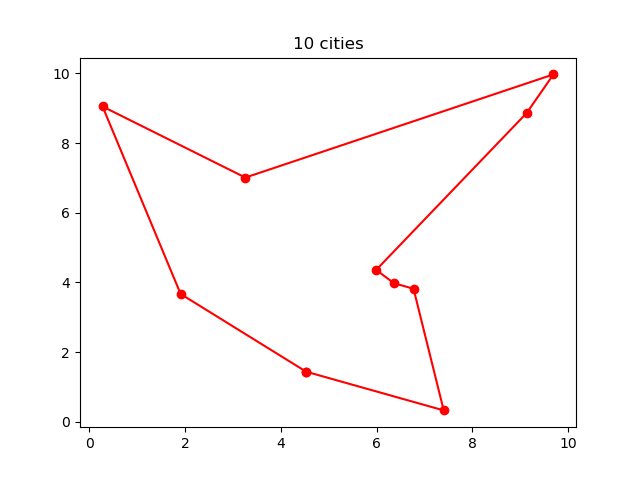

In [16]:
x, y = [], []
for i in range(len(final)):
    x.append(final[i][1][0])
    y.append(final[i][1][1])

# To complete the loop, and ending at the starting city
x.append(final[0][1][0])
y.append(final[0][1][1])
# plt.close('all')
plt.close()
plt.title('10 cities')
plt.plot(x, y, 'ro', linestyle = 'solid')
plt.show()

In [17]:
final = simulated_annealing('tsp_100.txt')

C:\Users\sujal\AppData\Local\Temp\ipykernel_5636\1595600420.py:35: RuntimeWarning: overflow encountered in double_scalars
  if(toss < np.exp(-(y-bestcost)/T)):


Final best cost =  82.58587507714543
Path of cities in which to travel = 
(20, (8.07, 8.2))  (94, (6.6, 8.97))  (66, (6.52, 7.9))  (53, (6.77, 7.67))  (1, (6.82, 5.93))  (35, (6.45, 6.05))  (5, (4.75, 4.65))  (42, (4.07, 4.88))  (18, (3.78, 5.38))  (89, (4.06, 5.86))  (17, (4.45, 6.82))  (77, (4.46, 7.22))  (7, (4.49, 7.54))  (81, (4.61, 8.27))  (19, (4.96, 8.0))  (100, (5.33, 8.05))  (8, (5.39, 8.46))  (28, (5.51, 8.94))  (15, (5.92, 9.78))  (37, (4.22, 8.74))  (23, (3.44, 9.44))  (22, (3.28, 9.07))  (55, (2.14, 8.78))  (4, (2.16, 9.79))  (56, (0.72, 9.59))  (32, (0.61, 8.79))  (54, (0.71, 7.8))  (98, (0.09, 7.91))  (30, (0.18, 6.54))  (60, (0.72, 6.95))  (72, (2.29, 6.76))  (91, (1.98, 6.49))  (74, (1.81, 5.54))  (97, (1.64, 5.15))  (65, (2.31, 4.43))  (29, (2.54, 4.04))  (78, (3.46, 3.68))  (90, (4.63, 4.29))  (3, (4.72, 3.88))  (6, (5.07, 3.79))  (68, (4.4, 2.99))  (79, (4.71, 2.9))  (27, (5.3, 2.95))  (9, (5.46, 2.7))  (24, (5.07, 2.23))  (86, (4.37, 2.15))  (11, (4.23, 2.16))  (3

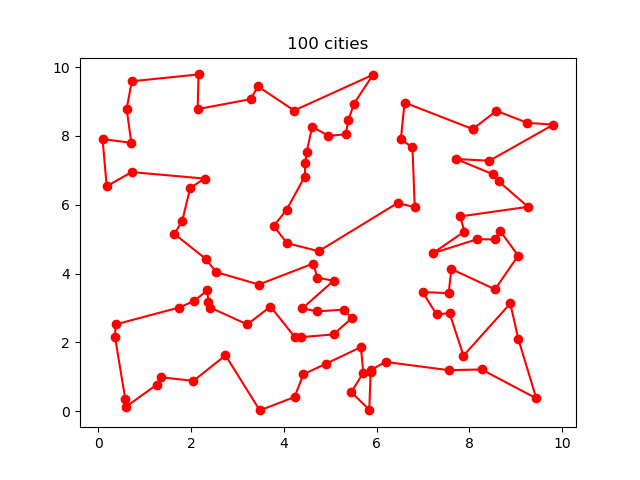

In [18]:
x, y = [], []
for i in range(len(final)):
    x.append(final[i][1][0])
    y.append(final[i][1][1])

# To complete the loop, and ending at the starting city
x.append(final[0][1][0])
y.append(final[0][1][1])
# plt.close('all')
plt.close()
plt.title('100 cities')
plt.plot(x, y, 'ro', linestyle = 'solid')
plt.show()